Libraries

In [9]:
import matplotlib.pyplot as plt 
from numpy import array, zeros 
from statistics import mean
from sklearn.metrics import r2_score
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

Reading Data set


In [10]:
df = pd.read_csv("unnati_phase1_data.csv")
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
...,...,...,...,...,...,...,...
22398,cas_hmw,2022-06-31,20:29:05,13.066866,80.254351,5339,8
22399,cas_hmw,2022-06-31,20:30:33,13.067575,80.249719,5339,27
22400,cas_hmw,2022-06-31,20:30:35,13.067575,80.249719,5339,27
22401,cas_hmw,2022-06-31,20:30:36,13.067575,80.249719,5339,27


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22403 entries, 0 to 22402
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Alert    22403 non-null  object
 1   Date     22403 non-null  object
 2   Time     22403 non-null  object
 3   Lat      22403 non-null  object
 4   Long     22403 non-null  object
 5   Vehicle  22403 non-null  object
 6   Speed    22403 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [12]:
record_id = '805'
desired_record = df[df['Vehicle'] == record_id]

# Print the extracted record(s)
print(desired_record)

         Alert        Date      Time        Lat       Long Vehicle Speed
15     cas_ldw  2022-06-01  06:05:10   12.87899  80.080324     805    13
16     cas_ldw  2022-06-01  06:06:41  12.873922  80.078184     805    59
17     cas_ldw  2022-06-01  06:07:12   12.86711  80.075508     805    58
18     cas_ldw  2022-06-01  06:07:50  12.855921  80.069229     805    58
19     cas_ldw  2022-06-01  06:08:17  12.852359  80.066607     805    58
...        ...         ...       ...        ...        ...     ...   ...
22327  cas_hmw  2022-06-31  17:38:23  13.067585  80.249678     805    11
22328  cas_hmw  2022-06-31  17:38:28  13.067585  80.249678     805    11
22329  cas_hmw  2022-06-31  17:38:28  13.067585  80.249678     805    11
22330  cas_fcw  2022-06-31  17:38:56  13.067777  80.248191     805    20
22333  cas_pcw  2022-06-31  17:39:35  13.066243  80.247866     805     0

[9390 rows x 7 columns]


In [13]:
df['Coordinates'] = df['Lat'].astype(str) + ', ' + df['Long'].astype(str)


Coordinates=df["Coordinates"].to_numpy()
print(Coordinates)


['12.887403, 80.083412' '12.892586, 80.085794' '12.894932, 80.087564' ...
 '13.067575, 80.249719' '13.067575, 80.249719' '13.067724, 80.248822']


In [16]:
Coordinates=df["Coordinates"].to_numpy()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame with Point geometry
geometry = [Point(xy) for xy in Coordinates]
geo_df = gpd.GeoDataFrame({'geometry': geometry})

print(geo_df.head())


/tmp/ipykernel_5949/2812526236.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


TypeError: iteration over a 0-d array

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

geometry = [Point(xy) for xy in Coordinates]
geo_df = gpd.GeoDataFrame({'geometry': geometry})

print(geo_df.head())

/tmp/ipykernel_5949/55823639.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


TypeError: iteration over a 0-d array

Data Visualization

In [ ]:


# Assuming df is your DataFrame
df['Coordinates'] = df['Lat'].astype(str) + ', ' + df['Long'].astype(str)
Time=df["Time"].to_numpy()
Coordinates=df["Coordinates"].to_numpy()



ValueError: x and y must be the same size

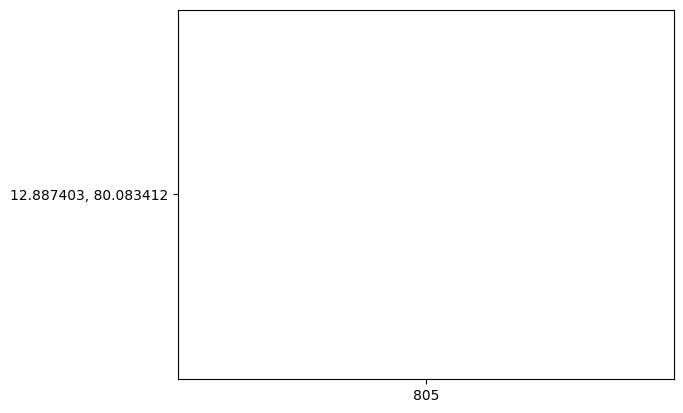

In [ ]:
plt.scatter(desired_record.Vehicle,Coordinates)
plt.xlabel("A")
plt.ylabel("Coordinates")
plt.grid()